In [3]:
import pandas as pd
import time
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import datetime
import os
import seaborn as sns
import math as mth
import pickle
import re
import nltk
import spacy
import sklearn

import tika
from tika import parser

import bokeh
from bokeh.plotting import *
from bokeh.io import output_notebook
from bokeh.models import Toggle, BoxAnnotation, CustomJS, HoverTool

output_notebook()


sns.set_style("white")

%matplotlib inline

from IPython.display import display

from IPython.display import HTML

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

Loading BokehJS ...

In [4]:
from tiingo import TiingoClient

config = {}

config['api_key'] = "your tiingo api key here"

client = TiingoClient(config)

from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [7]:
def hist_data(symbol,startDate,endDate,frequency):
    data = client.get_ticker_price(ticker=symbol,
                                        startDate=startDate,
                                        endDate=endDate,
                                        frequency=frequency)
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
    df.index = df['date']
    
    return df

In [8]:
def create_forecast(symbol,start_date,end_date,frequency):
    
    startDate = start_date
    endDate = end_date
    #endDate = pd.datetime.today()
    #frequency = 'daily'
    frequency = frequency
    
    df1 = hist_data(symbol,startDate,endDate,frequency)
    
    
    df2 = pd.DataFrame(df1.iloc[:,:5],index=df1.index)

    df3 = pd.DataFrame(df2['adjClose'])
    df3['ds'] = df2.index
    df3.rename(columns={'adjClose':'y'},inplace=True)

    m = Prophet(growth='linear',
                uncertainty_samples=10000,
                daily_seasonality=True,
                yearly_seasonality=True,
                changepoint_prior_scale=0.13)

    m.fit(df3)
    
    future_prices = m.make_future_dataframe(periods=365)

    forecast = m.predict(future_prices)
    forecast[['ds','yhat','yhat_lower','yhat_upper','trend_lower','trend_upper']].tail()

    forecast2 = pd.DataFrame(forecast)
    forecast2.index = forecast['ds']
    
    RMSE = np.sqrt(np.mean((forecast['yhat'] - df3['y'])**2))
    
    return (df1.head(),df1.tail(),m.plot(forecast2),m.plot_components(forecast),print('RMSE:'.format(RMSE)))

In [32]:
#help(Prophet())
#help(Prophet.fit)

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 5min 44s


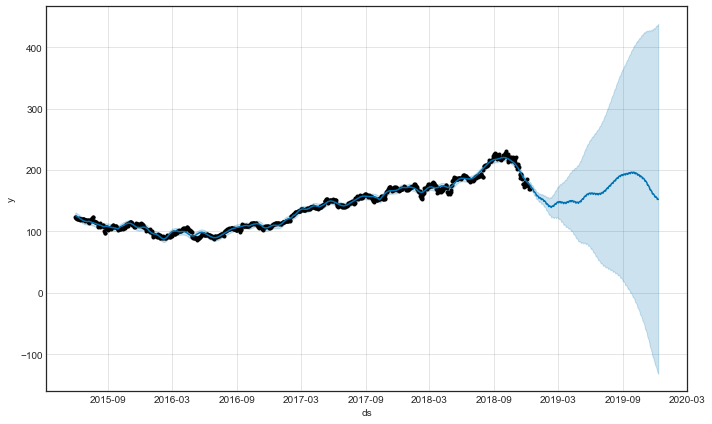

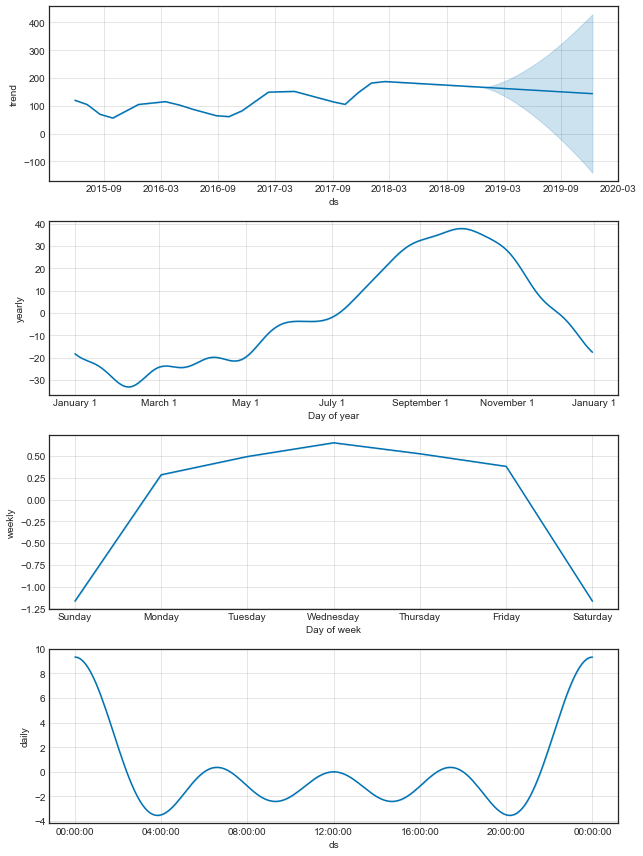

In [33]:
%%time
forecast_df1 = create_forecast('AAPL','2015-06-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 1min 12s


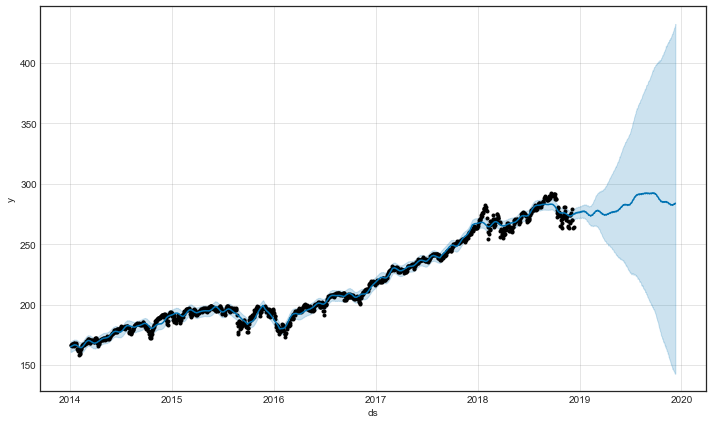

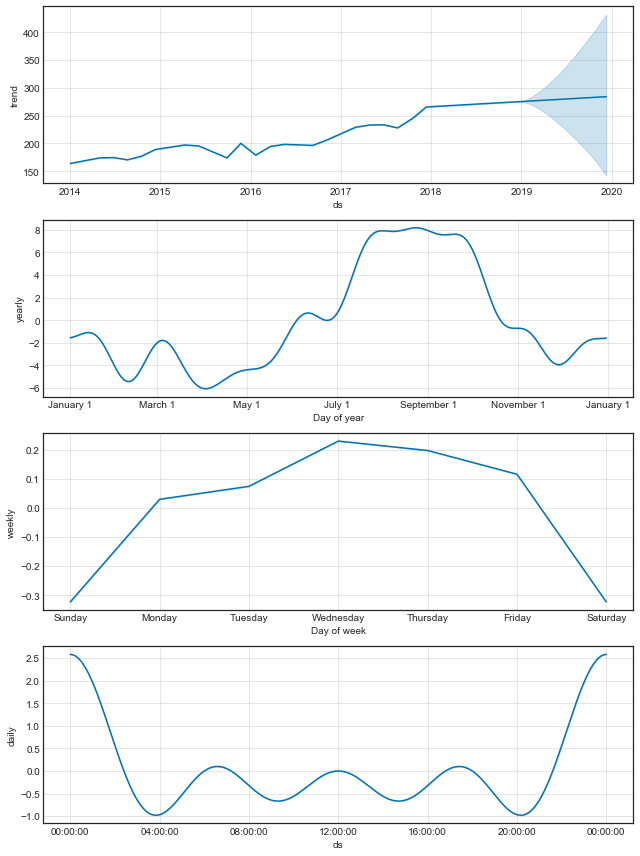

In [36]:
%%time
forecast_df1 = create_forecast('SPY','2014-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 1min 2s


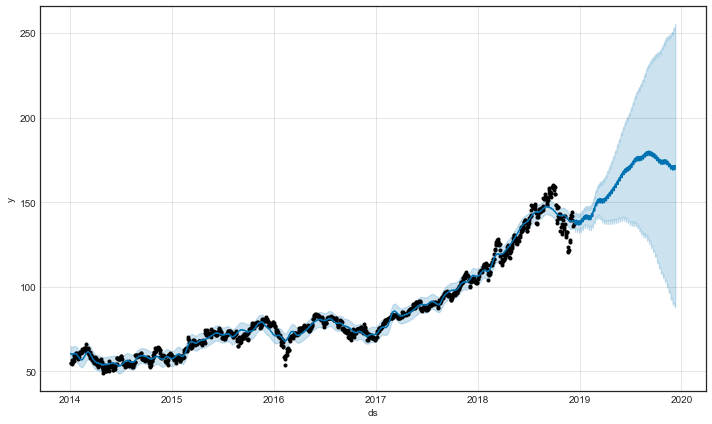

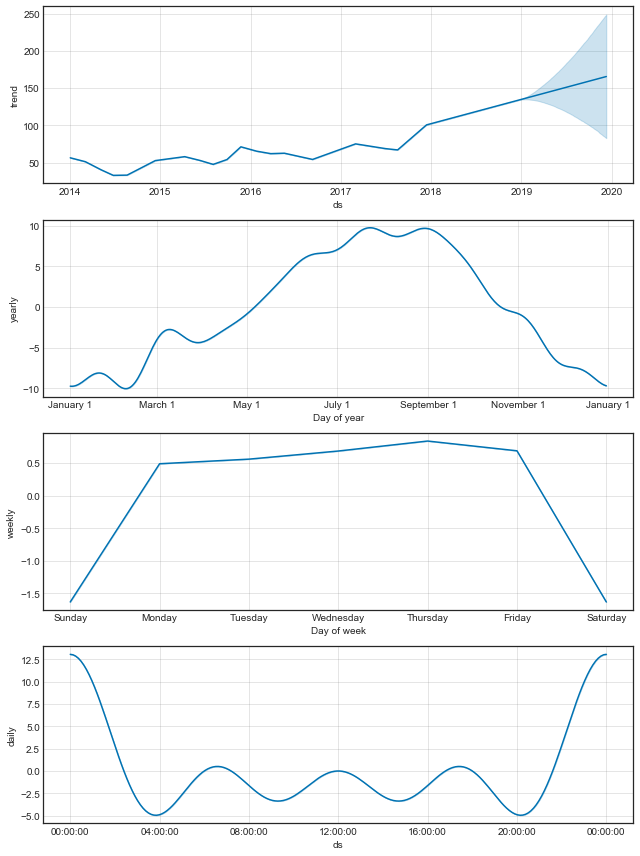

In [37]:
%%time
forecast_df1 = create_forecast('CRM','2014-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 23.8 s


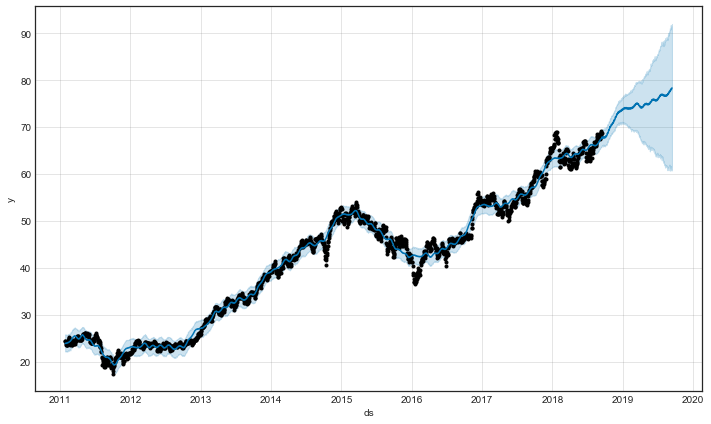

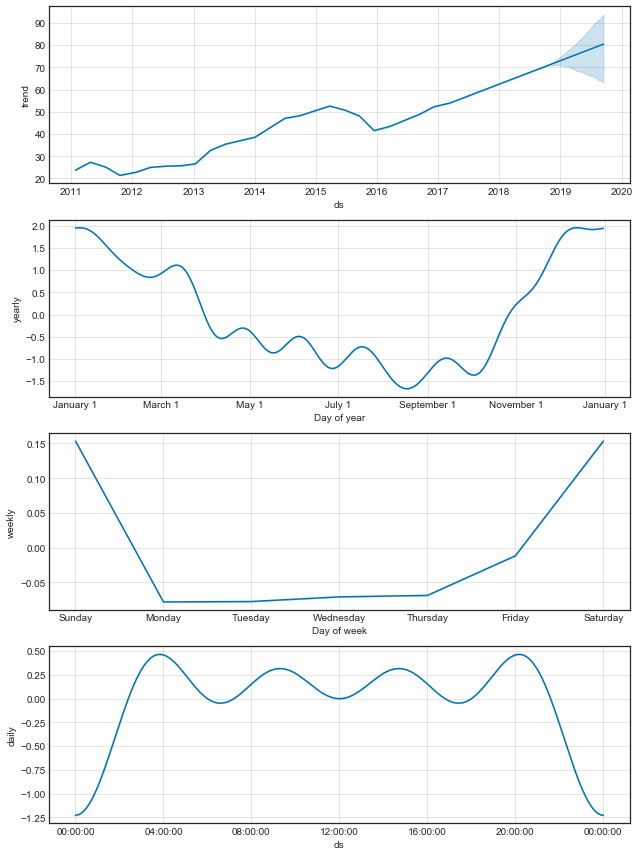

In [13]:
%%time
forecast_df1 = create_forecast('XTN','1900-01-01',datetime.date.today(),'daily')

4.733988446835885
Wall time: 53.2 s


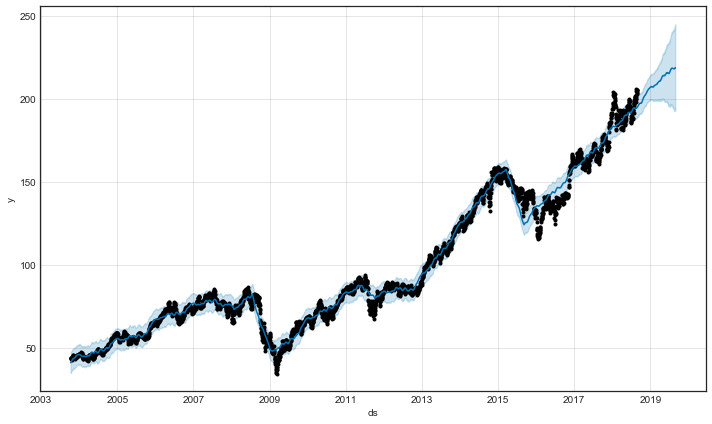

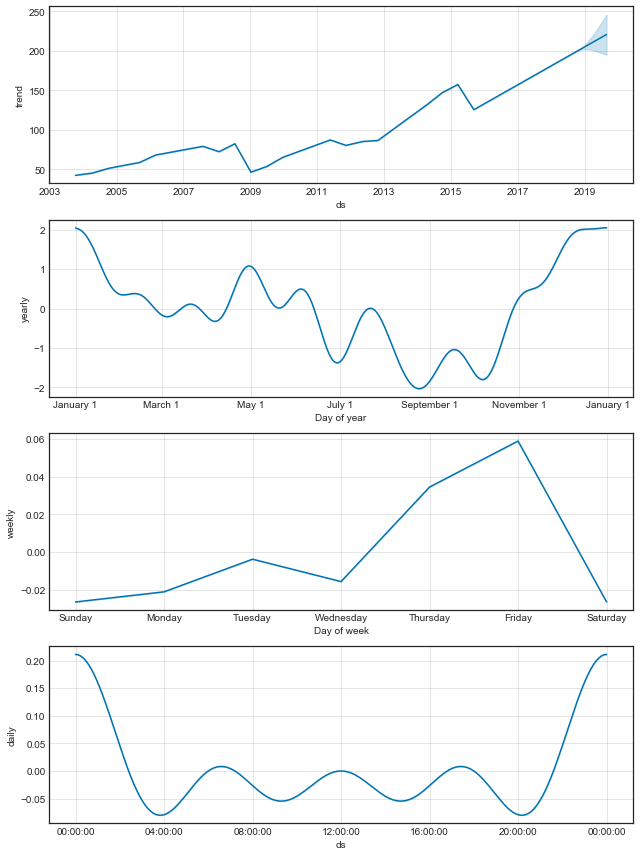

In [12]:
%%time
forecast_df1 = create_forecast('IYT','1900-01-01',datetime.date.today(),'daily')

0.6137549844128184
Wall time: 14.9 s


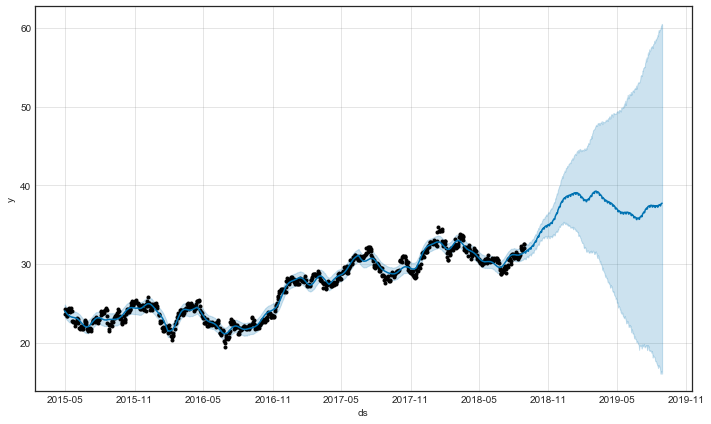

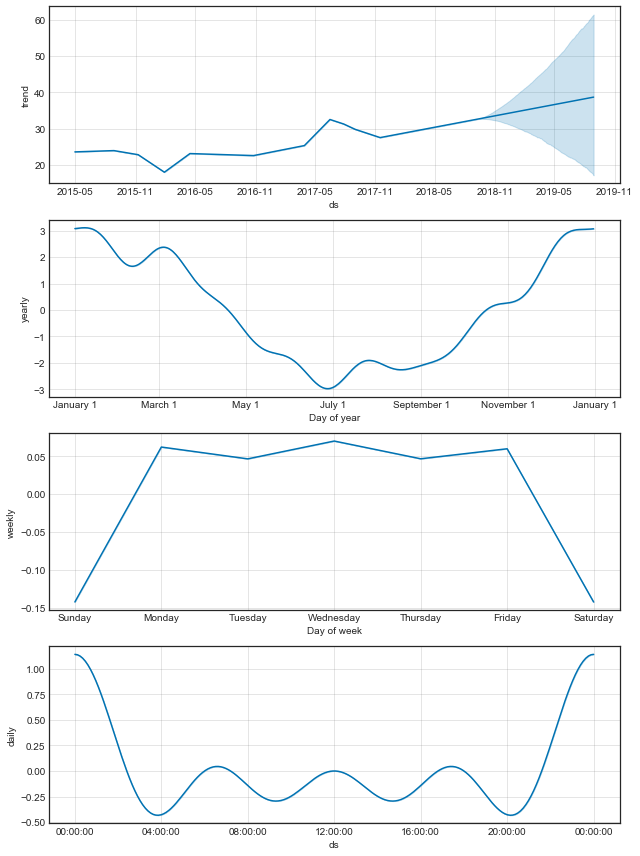

In [13]:
%%time
forecast_df1 = create_forecast('JETS','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


1.4625222321402367
Wall time: 41.2 s


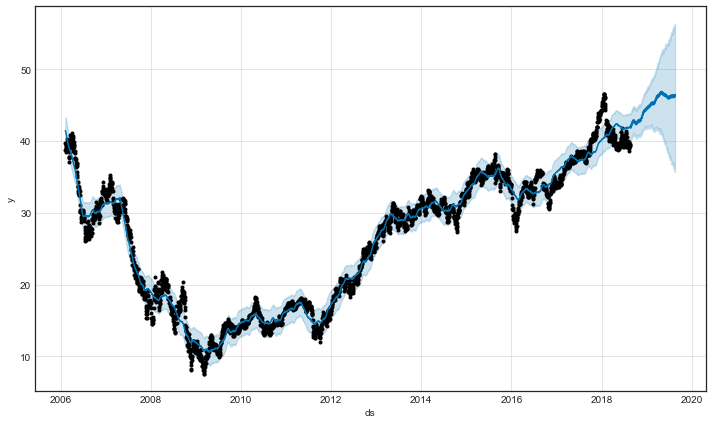

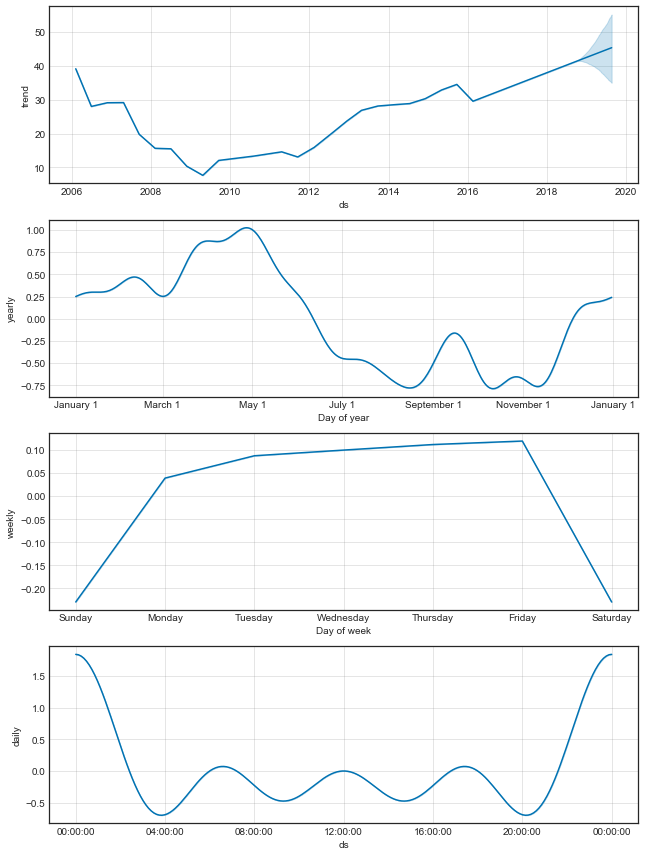

In [10]:
%%time
forecast_df1 = create_forecast('XHB','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


1.626176193497117
Wall time: 31.4 s


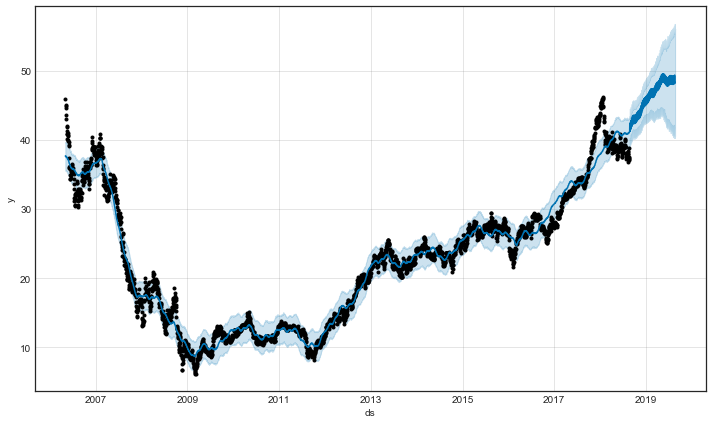

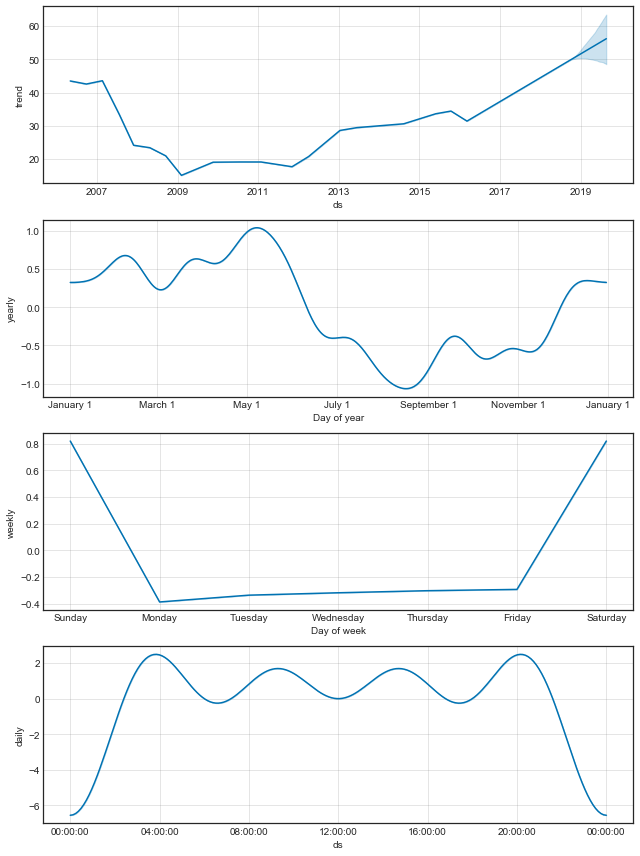

In [17]:
%%time
forecast_df1 = create_forecast('ITB','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


54.12450036970151
Wall time: 23.6 s


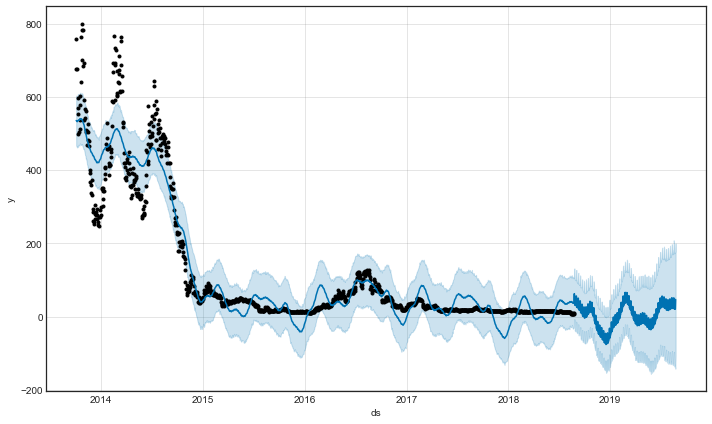

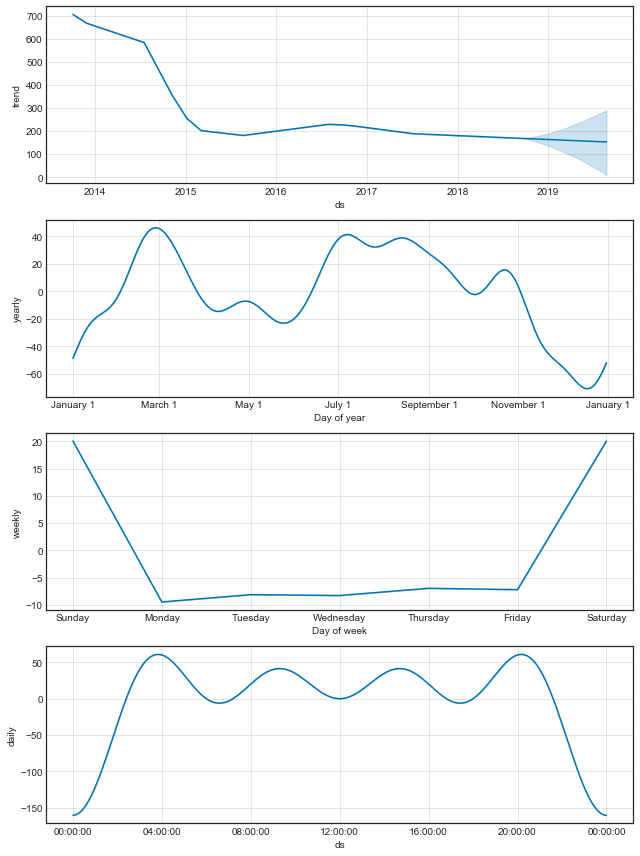

In [5]:
%%time
forecast_df1 = create_forecast('JNUG','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


4.487667730758324
Wall time: 47.7 s


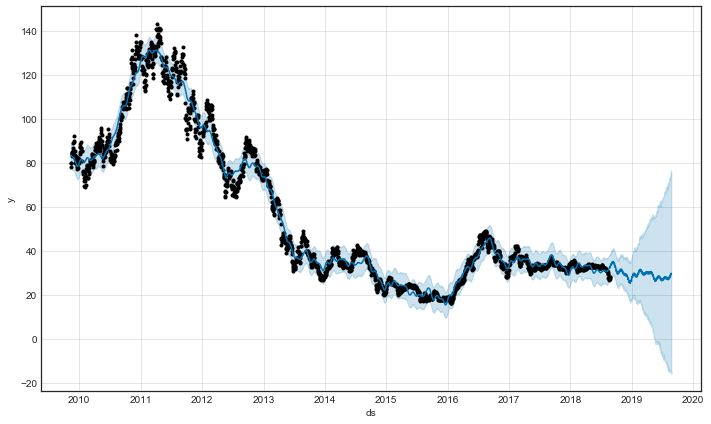

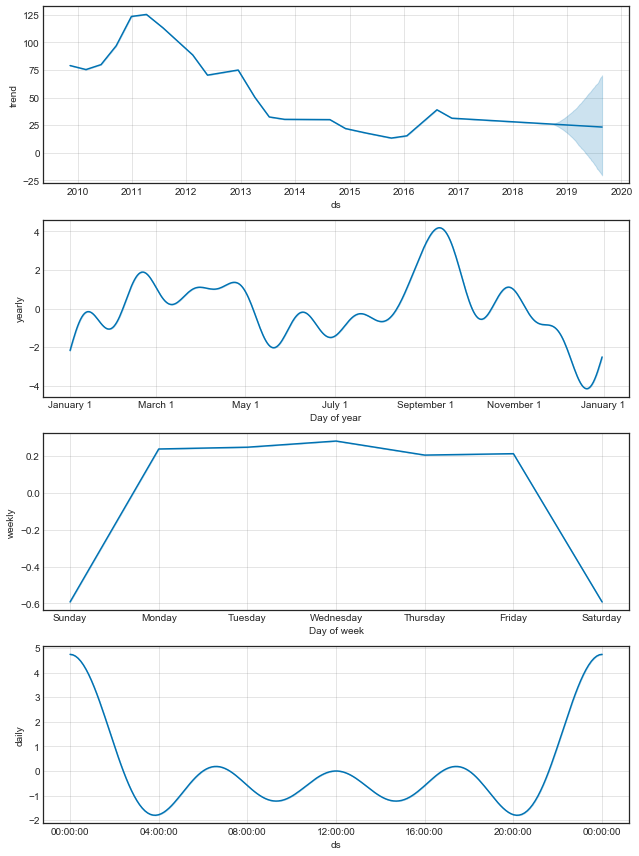

In [8]:
%%time
forecast_df1 = create_forecast('GDXJ','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


0.5919976226640556
Wall time: 12.5 s


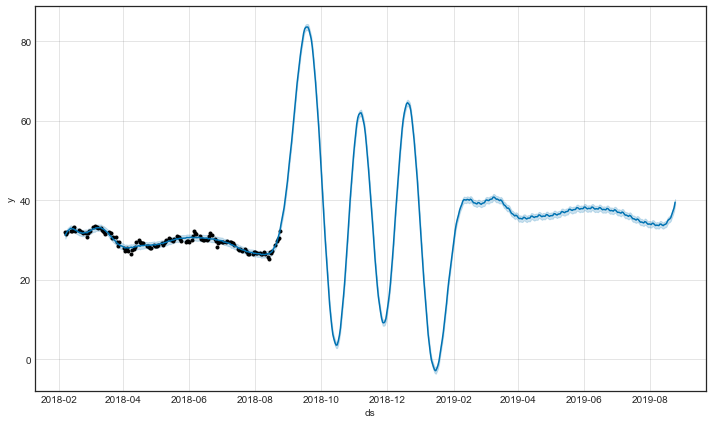

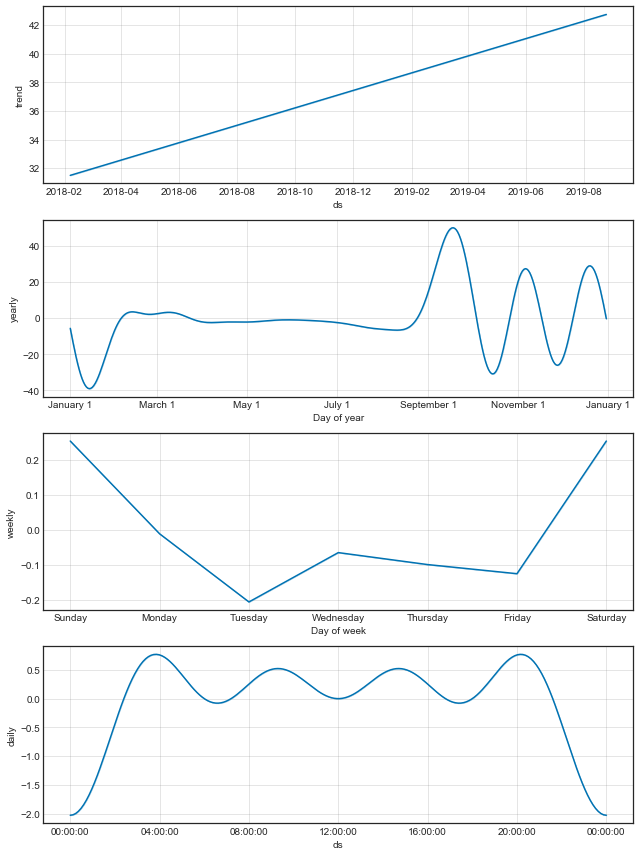

In [7]:
%%time
forecast_df1 = create_forecast('MJ','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


3.384858537839895
Wall time: 1min 4s


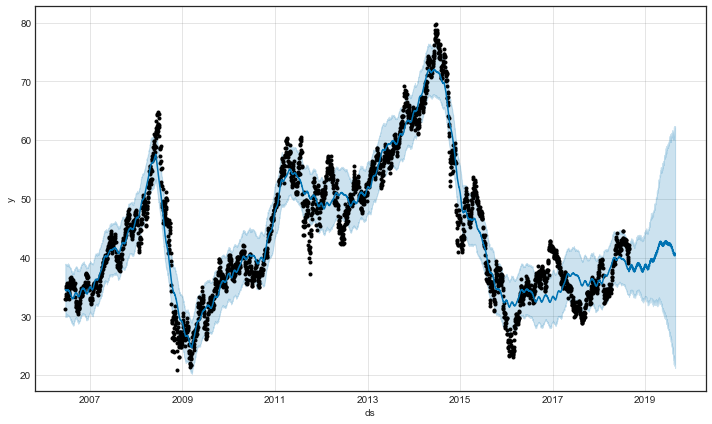

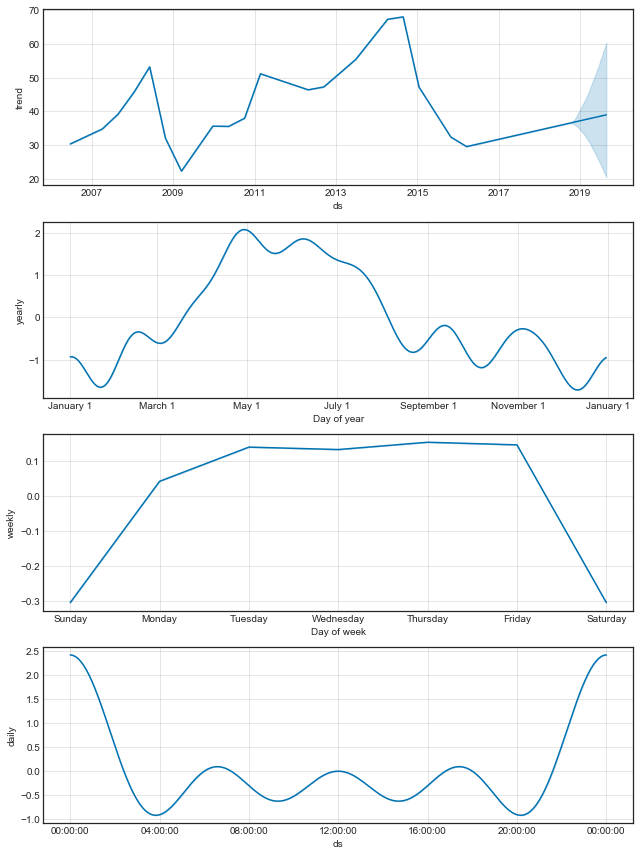

In [10]:
%%time
forecast_df1 = create_forecast('XOP','1900-01-01',datetime.date.today(),'daily')

6.752947475692069
Wall time: 1min 11s


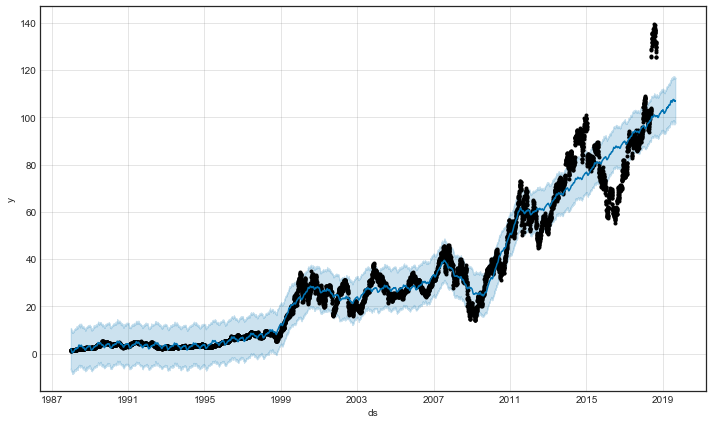

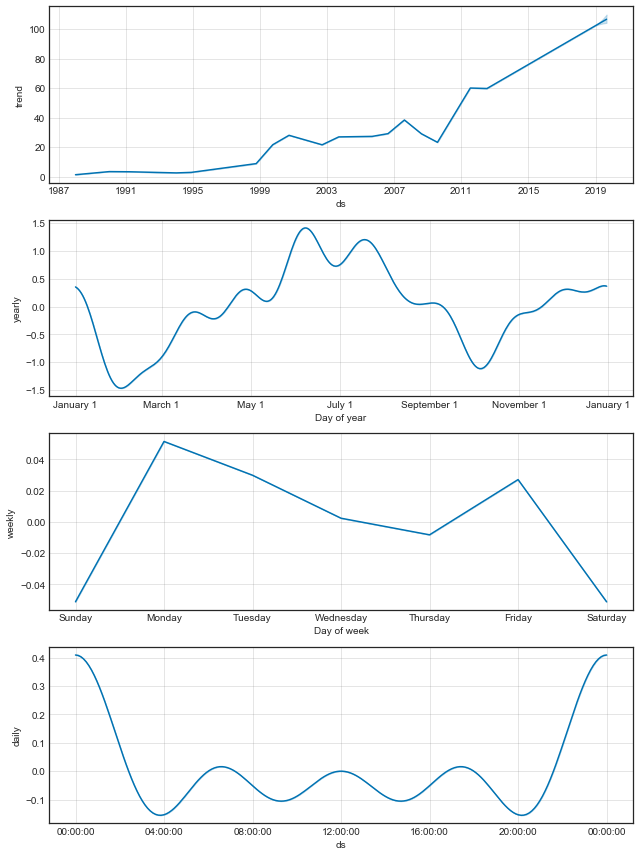

In [14]:
%%time
forecast_df1 = create_forecast('TIF','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


2.360369479591265
Wall time: 1min 4s


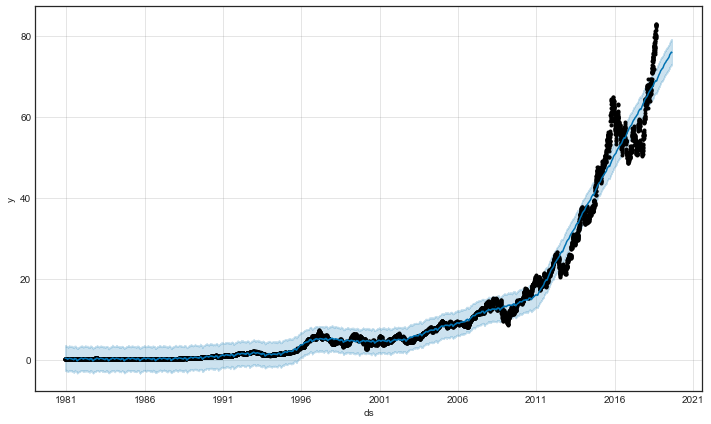

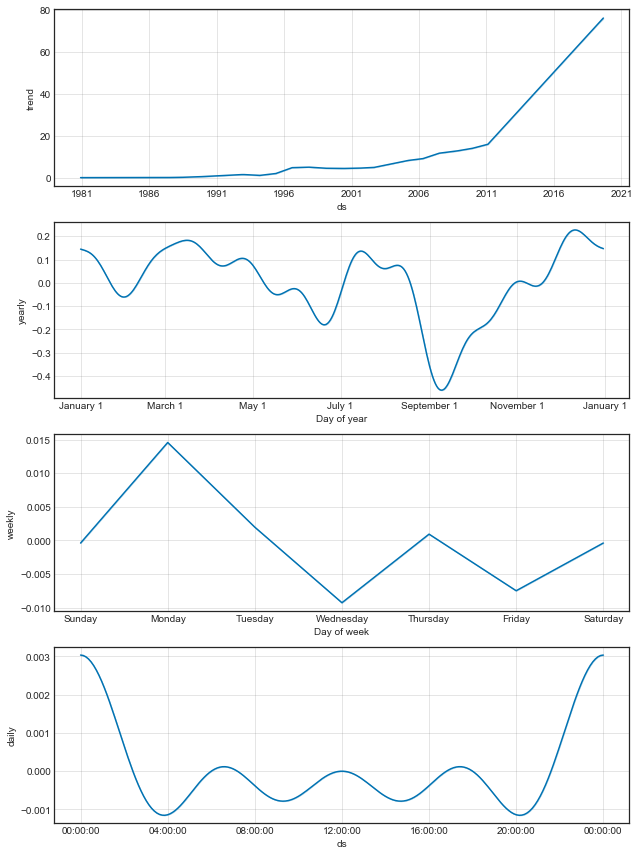

In [5]:
%%time
forecast_df1 = create_forecast('NKE','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


4.845663553255744
Wall time: 56.5 s


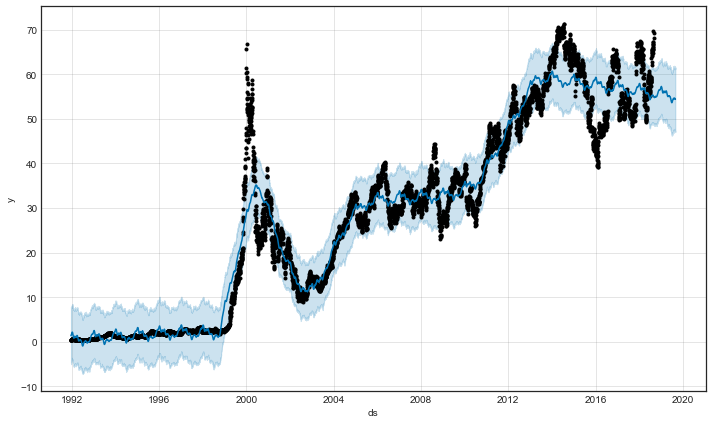

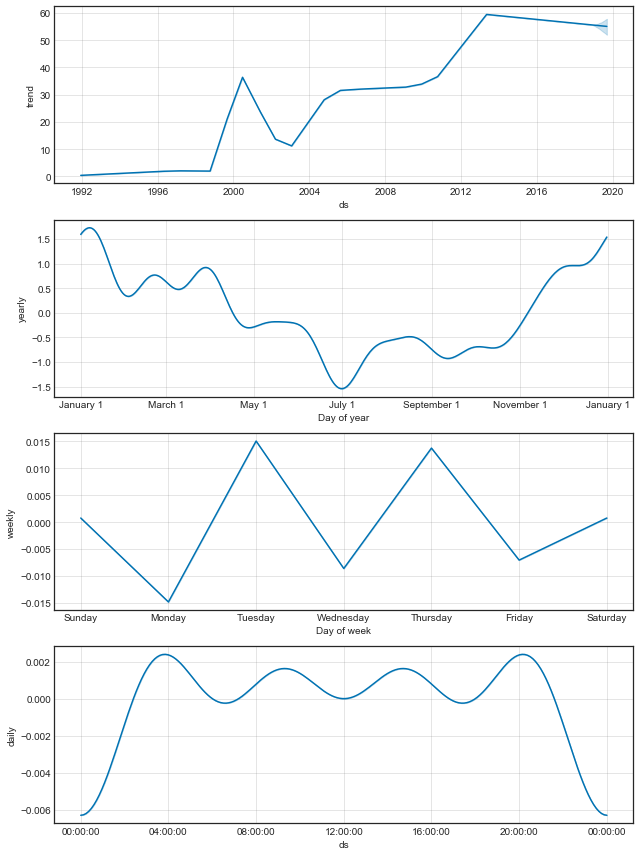

In [6]:
%%time
forecast_df1 = create_forecast('QCOM','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 15.7 s


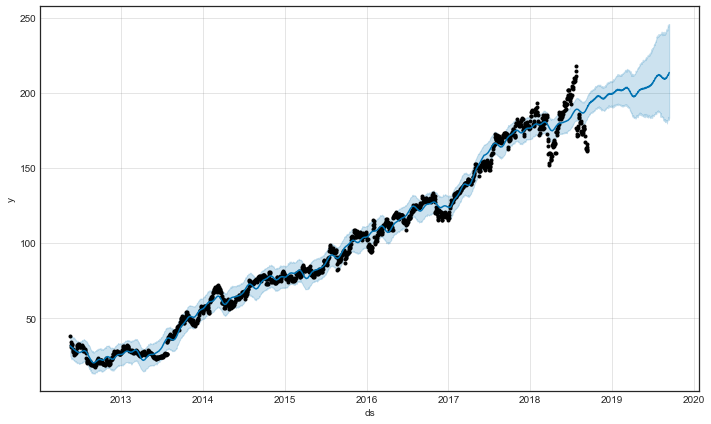

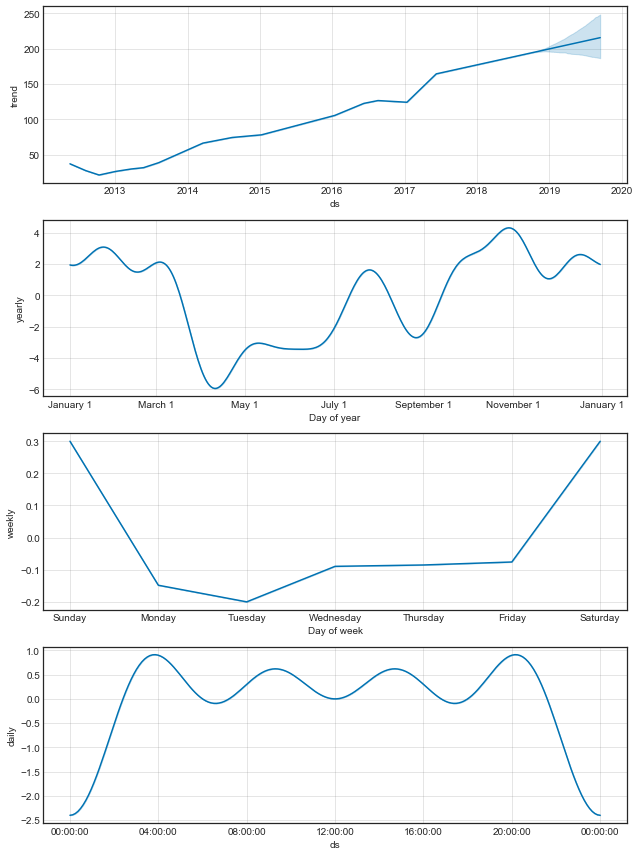

In [14]:
%%time
forecast_df1 = create_forecast('FB','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 36.4 s


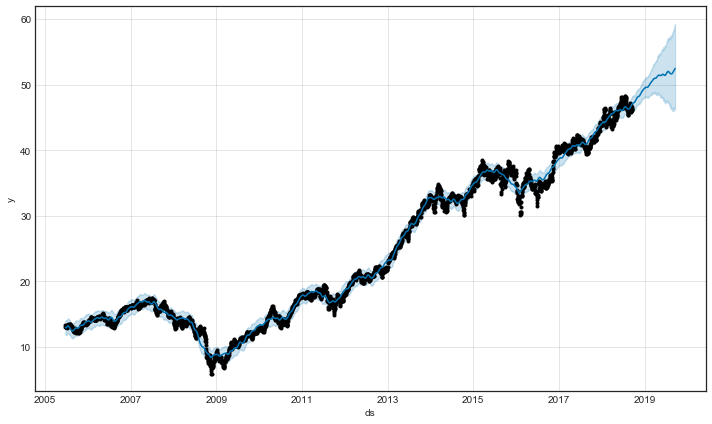

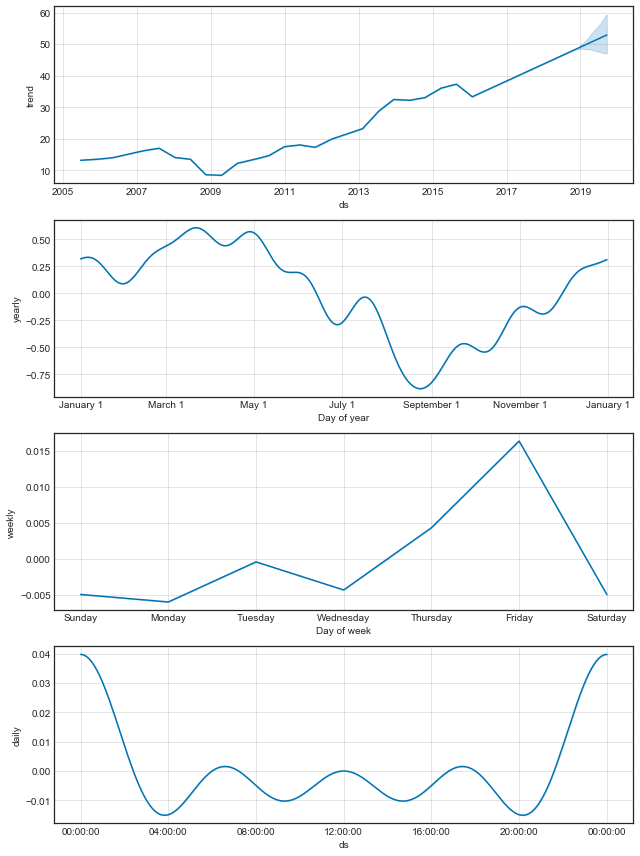

In [11]:
%%time
forecast_df1 = create_forecast('PEJ','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 32.7 s


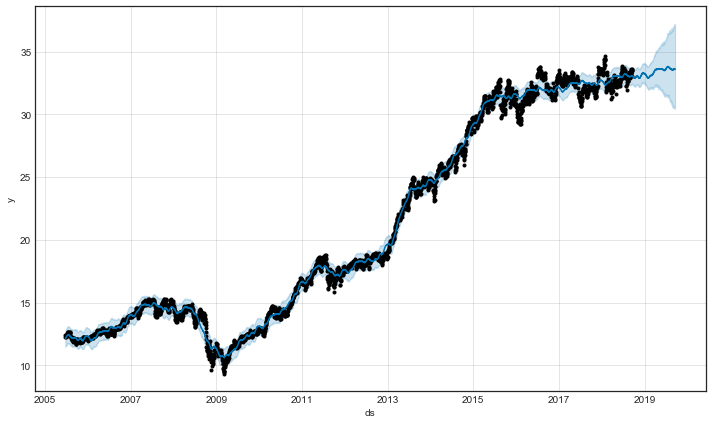

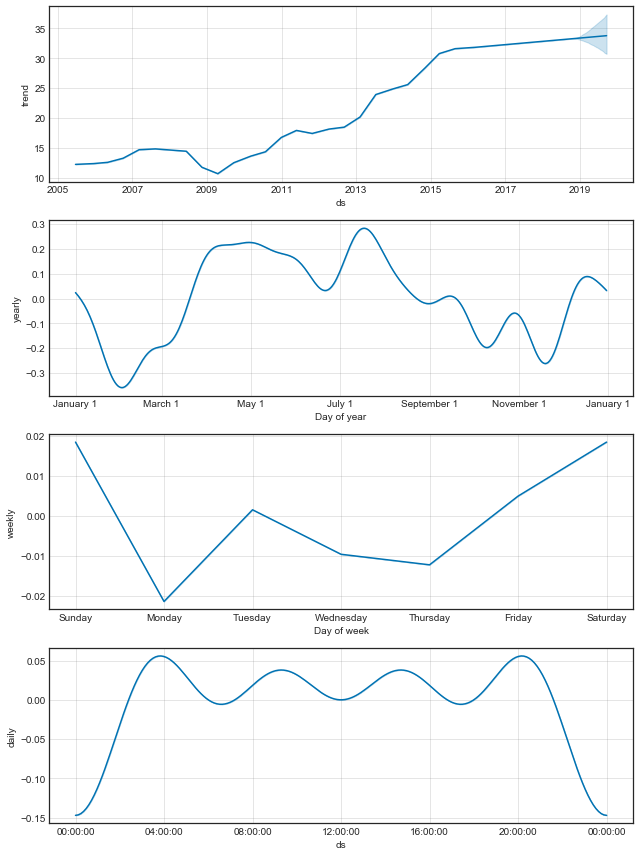

In [15]:
%%time
forecast_df1 = create_forecast('PBJ','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 21.6 s


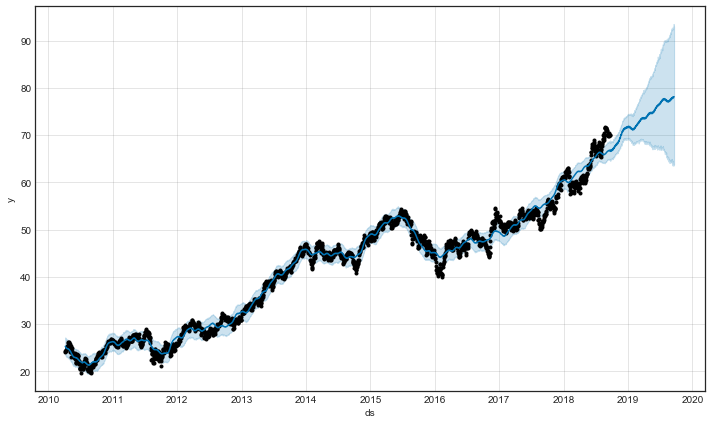

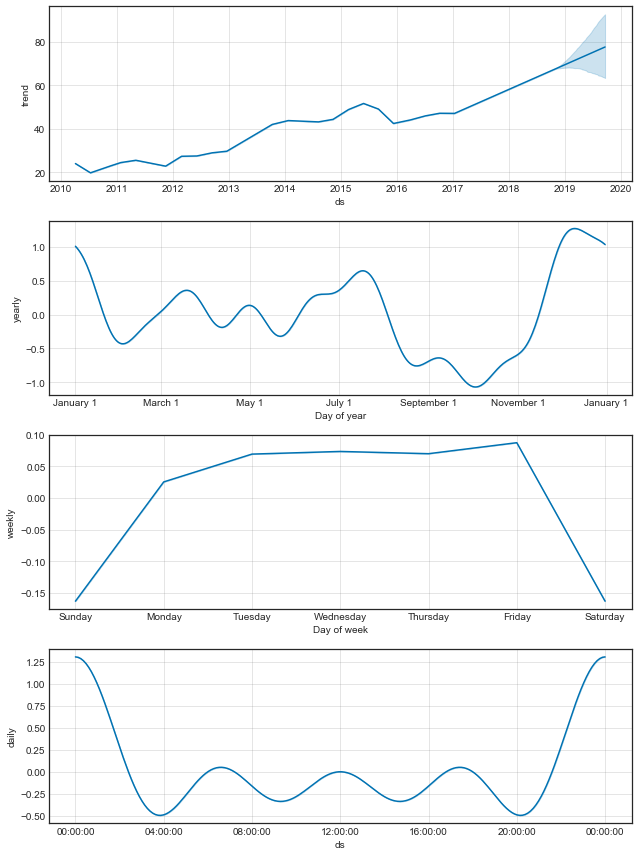

In [16]:
%%time
forecast_df1 = create_forecast('PSCD','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 38 s


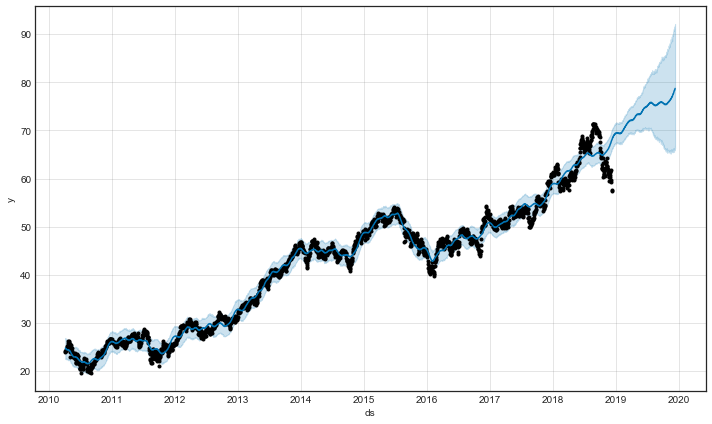

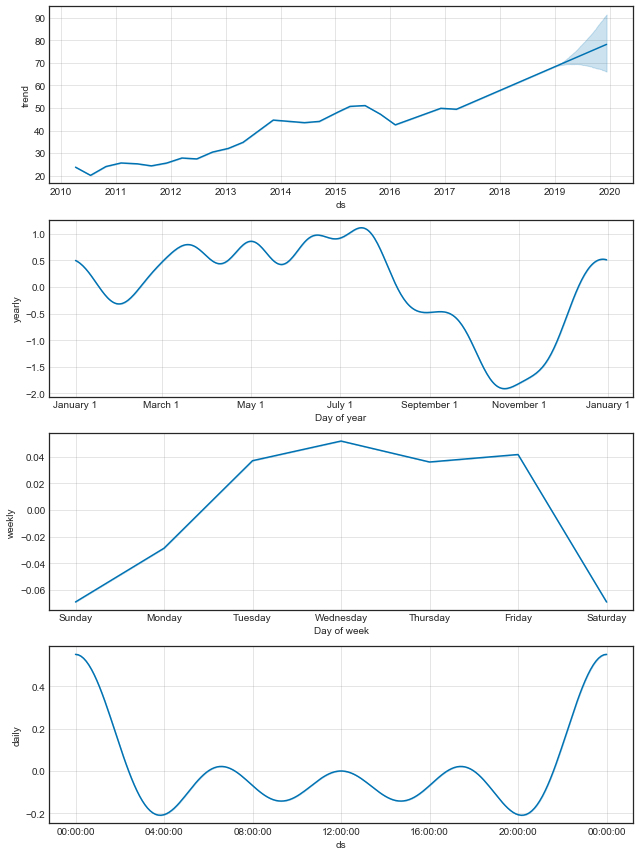

In [11]:
%%time
forecast_df1 = create_forecast('PSCD','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 12 s


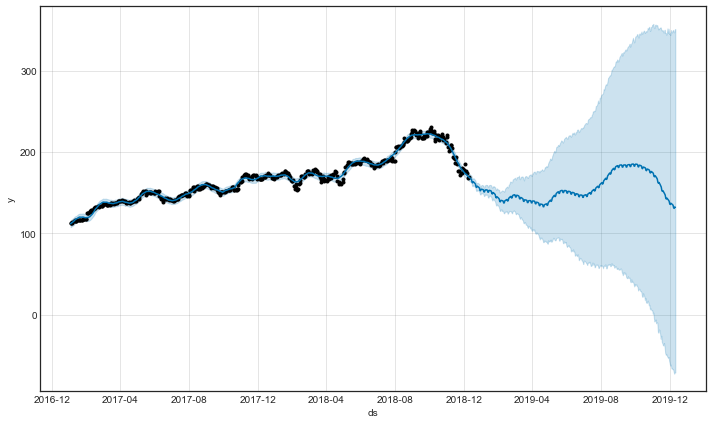

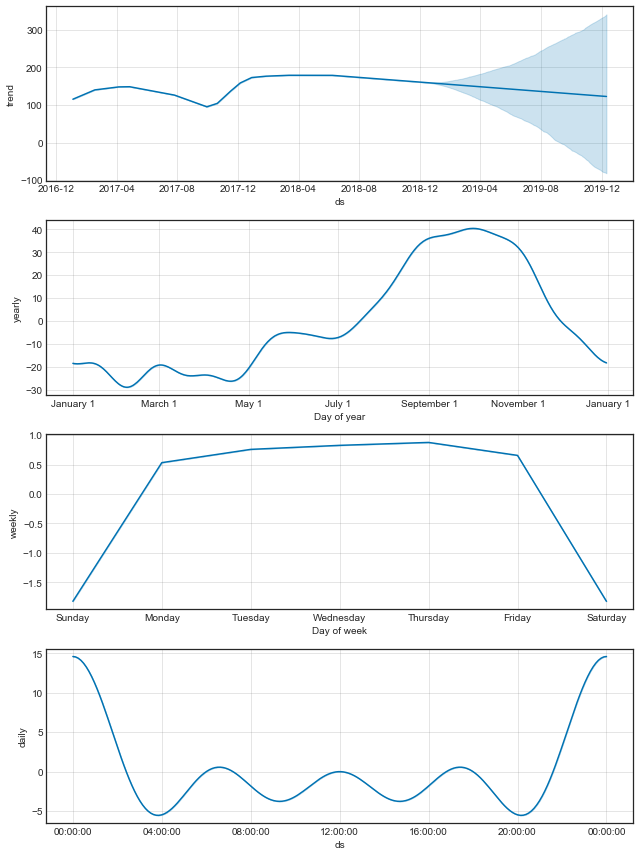

In [10]:
%%time
forecast_df1 = create_forecast('AAPL','2017-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 47.5 s


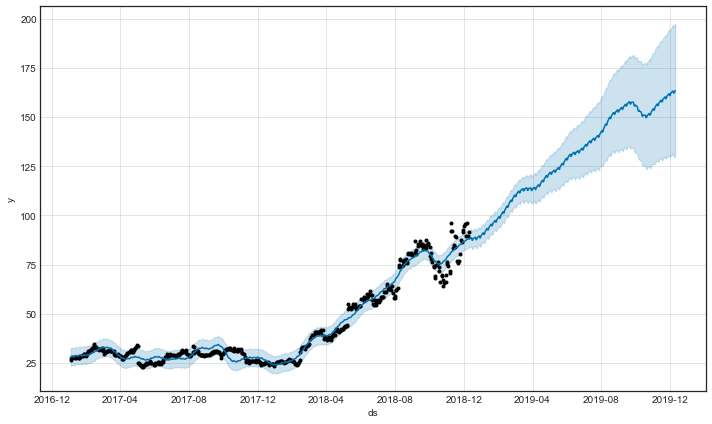

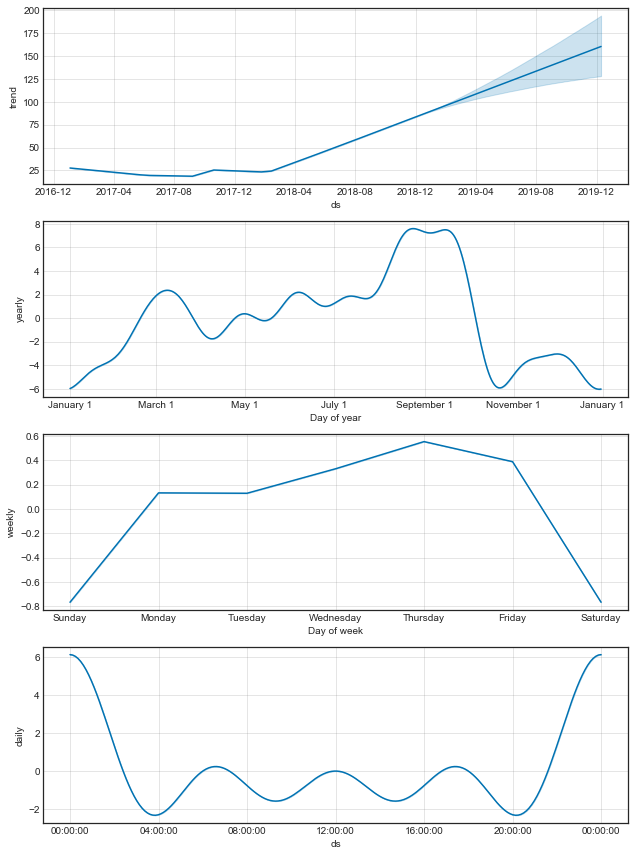

In [38]:
%%time
forecast_df1 = create_forecast('TWLO','2017-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 43.4 s


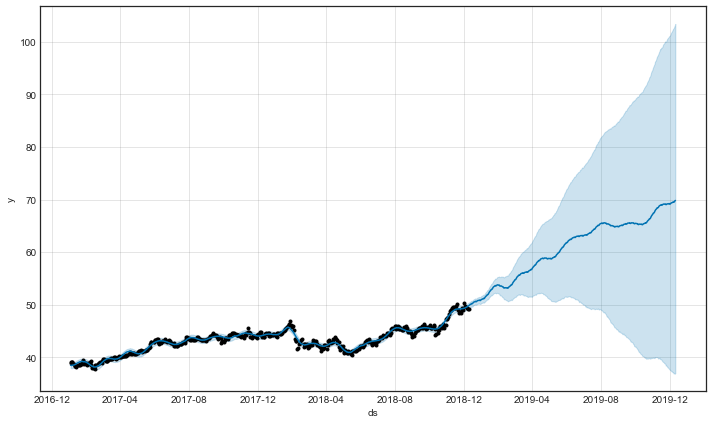

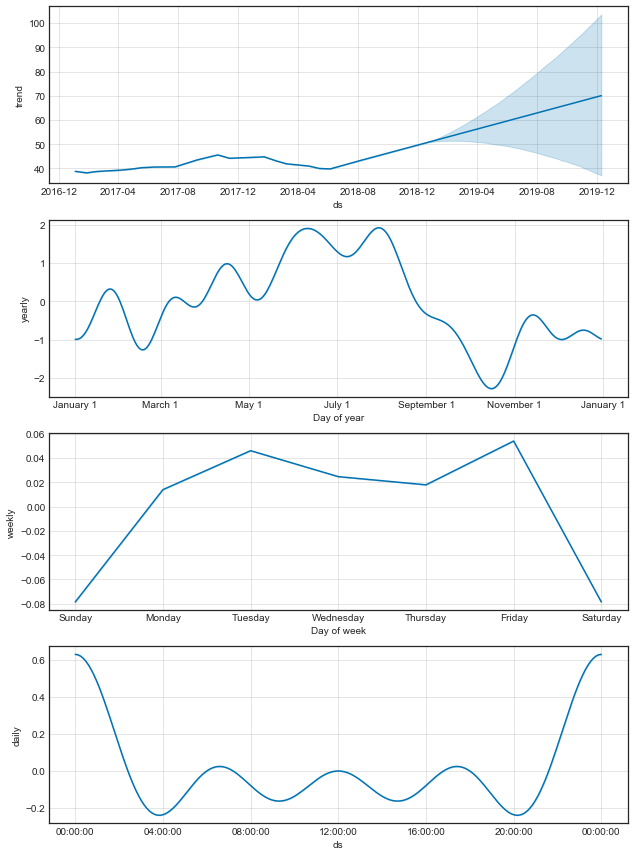

In [39]:
%%time
forecast_df1 = create_forecast('KO','2017-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 5min 7s


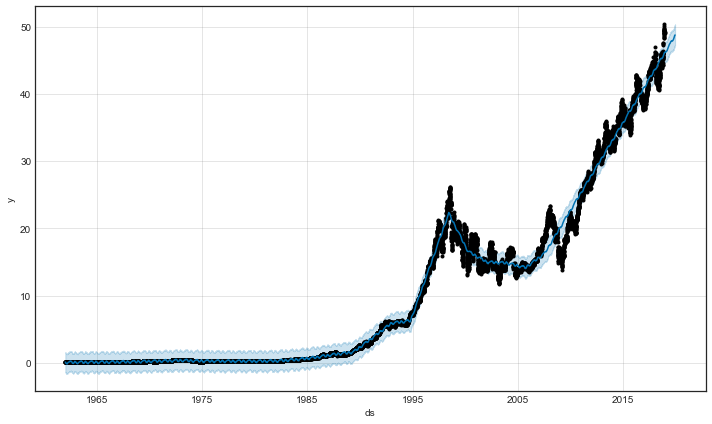

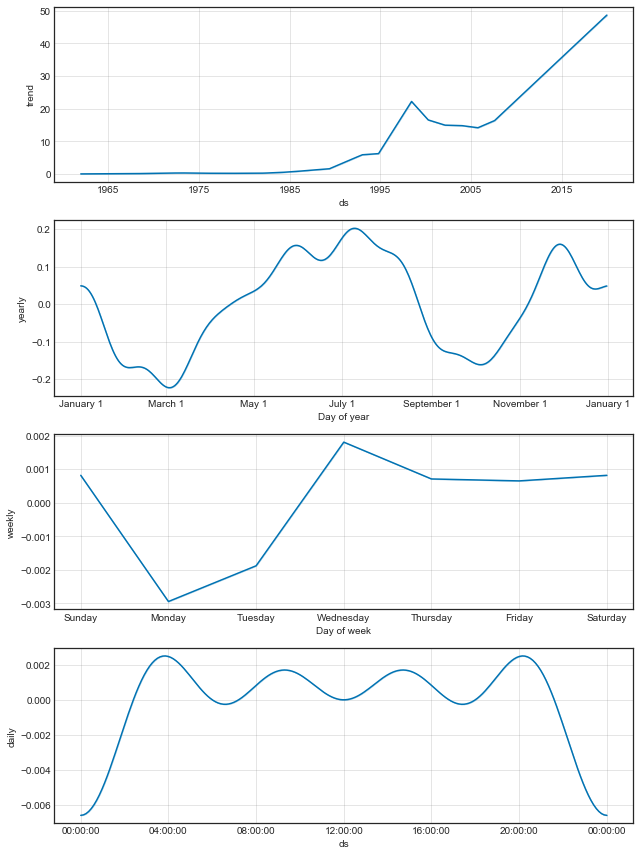

In [40]:
%%time
forecast_df1 = create_forecast('KO','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 56.4 s


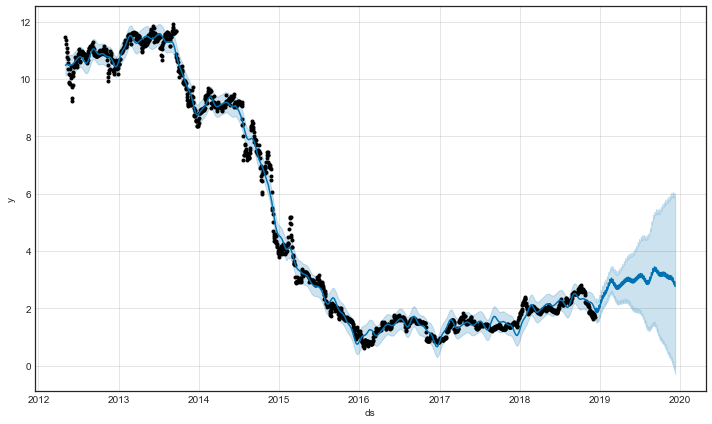

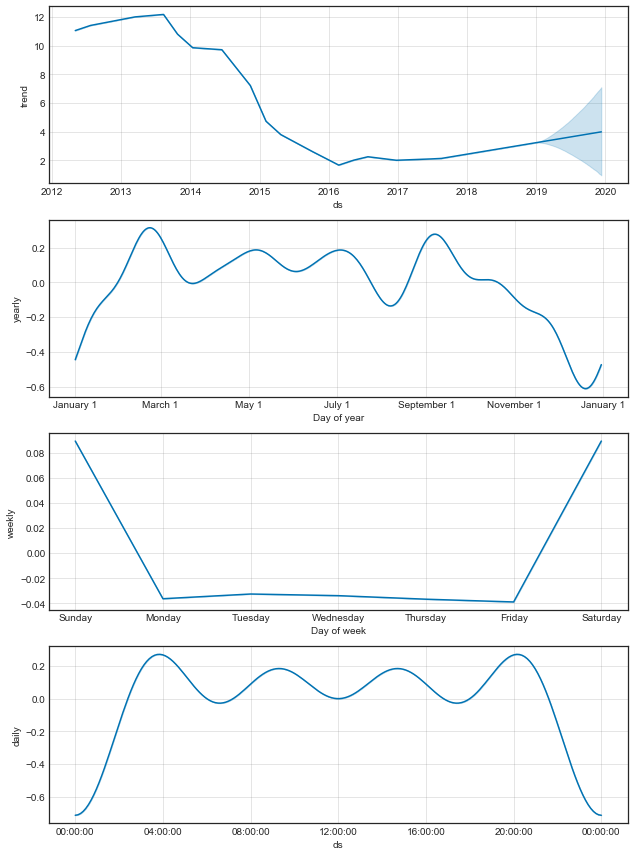

In [41]:
%%time
forecast_df1 = create_forecast('ROYT','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 48.2 s


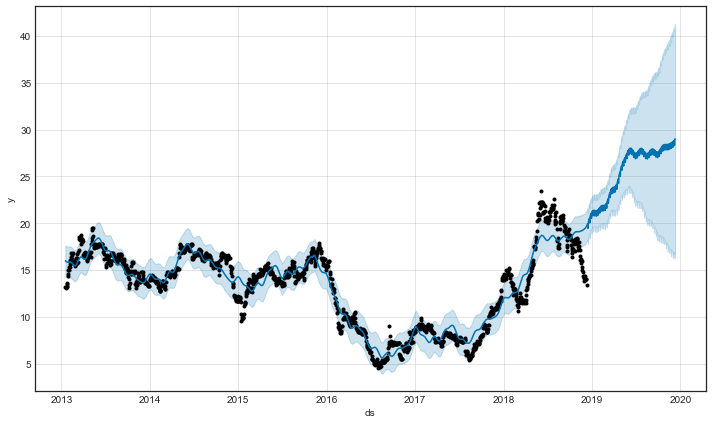

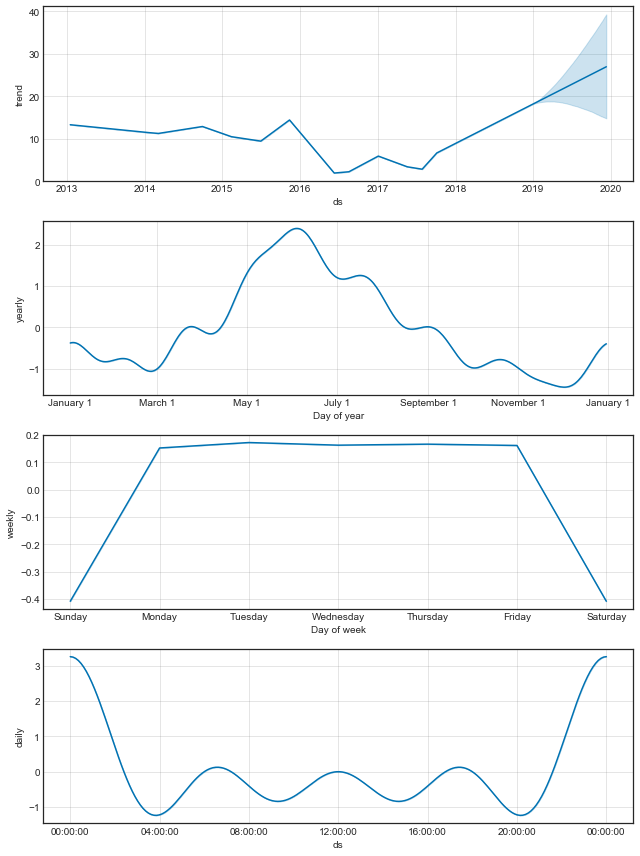

In [42]:
%%time
forecast_df1 = create_forecast('CVRR','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 57.9 s


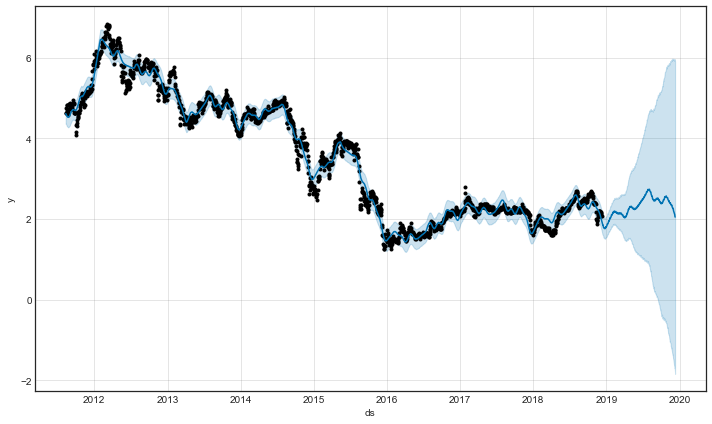

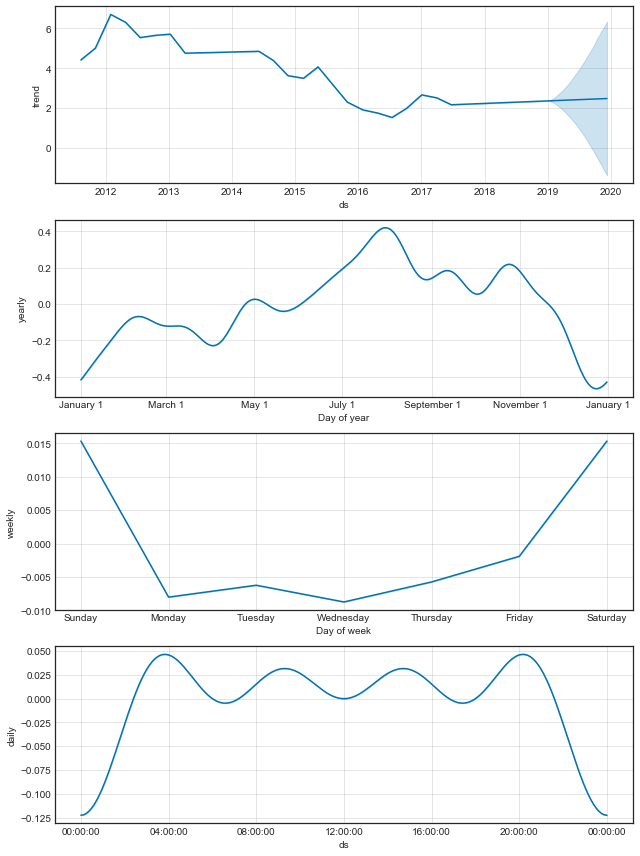

In [43]:
%%time
forecast_df1 = create_forecast('PER','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 1min 16s


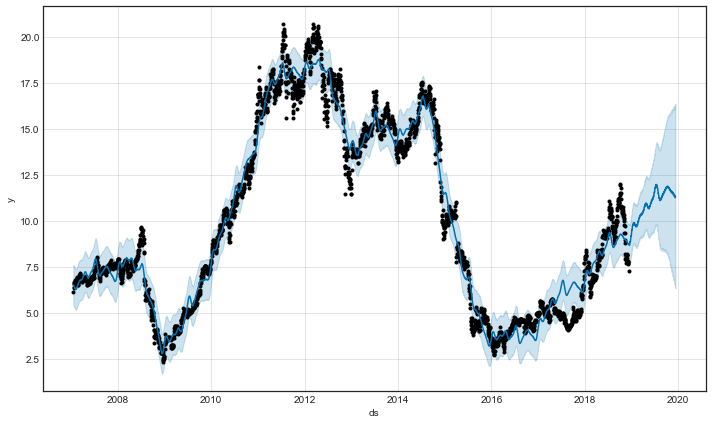

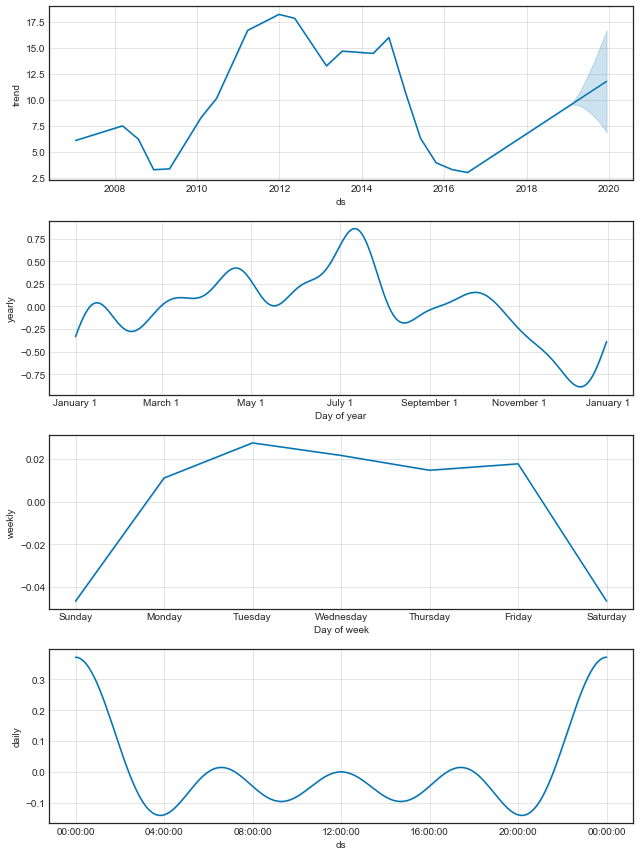

In [44]:
%%time
forecast_df1 = create_forecast('MVO','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 1min 1s


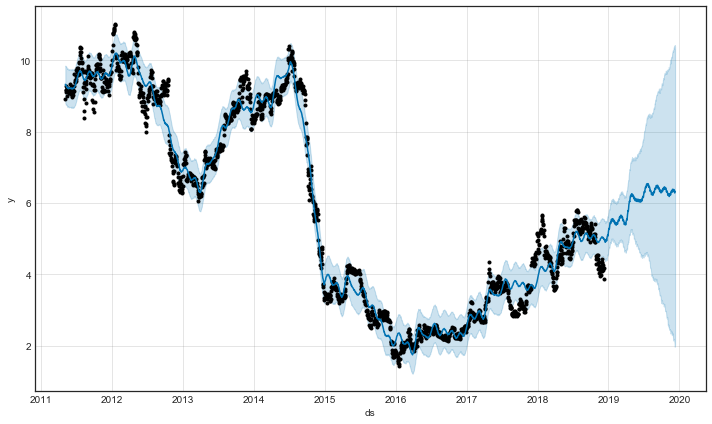

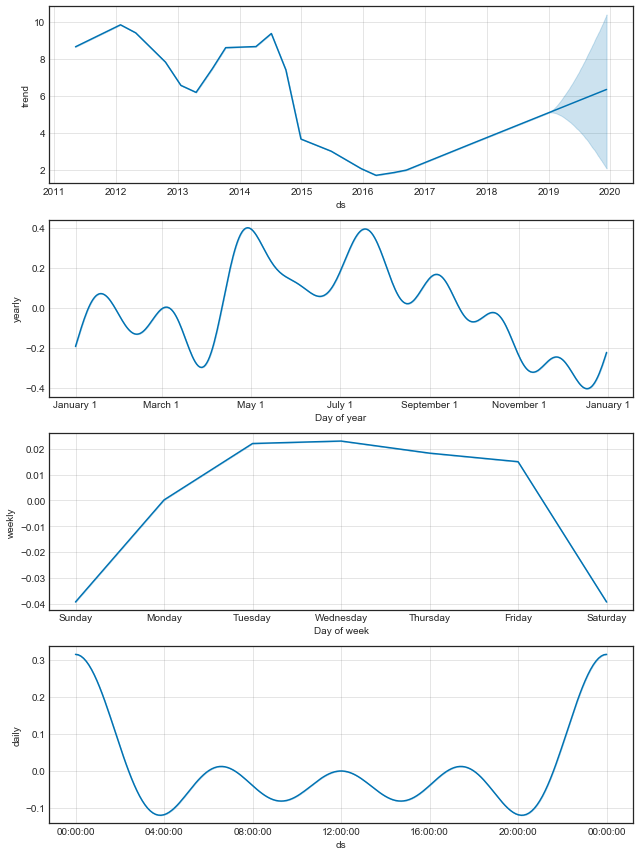

In [45]:
%%time
forecast_df1 = create_forecast('VOC','1900-01-01',datetime.date.today(),'daily')

C:\Users\zanderl\AppData\Local\Continuum\anaconda3\lib\site-packages\dateutil\parser\__init__.py:46: DeprecationWarning: _timelex is a private class and may break without warning, it will be moved and or renamed in future versions.
  warnings.warn(msg, DeprecationWarning)


RMSE:
Wall time: 2min 8s


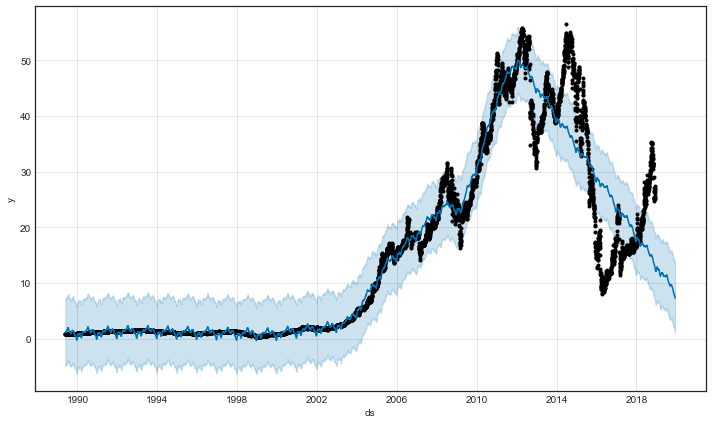

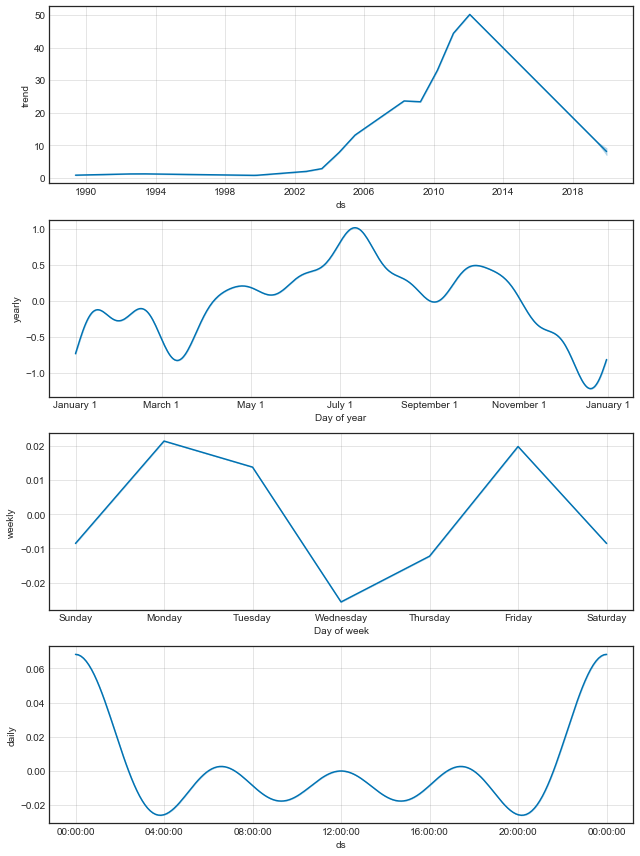

In [46]:
%%time
forecast_df1 = create_forecast('BPT','1900-01-01',datetime.date.today(),'daily')

RMSE:
Wall time: 1min 55s


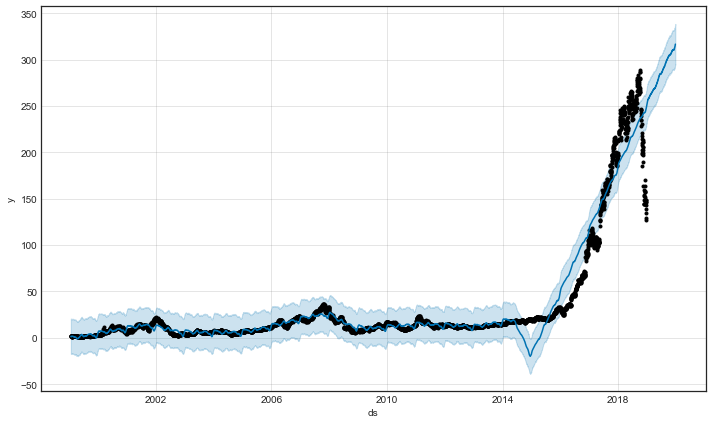

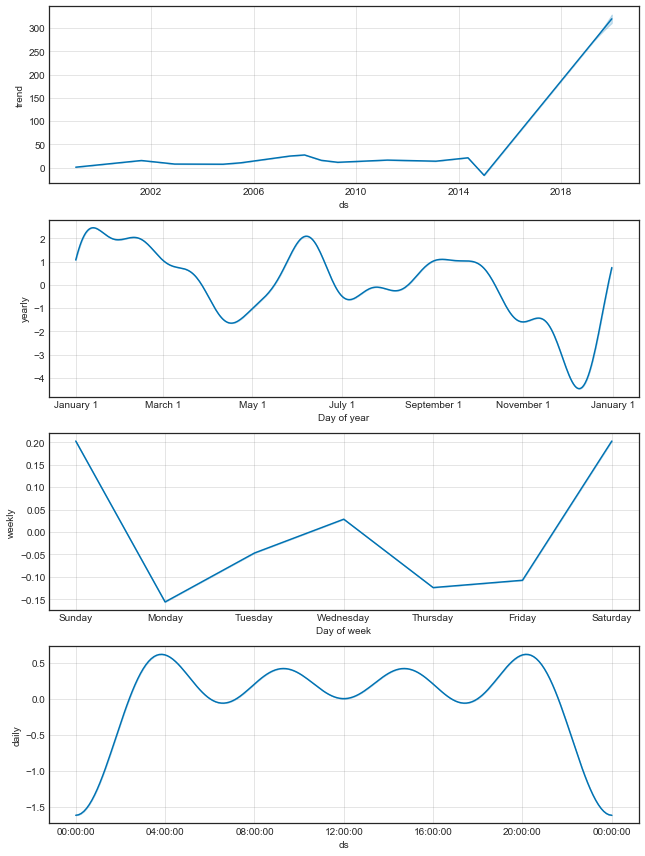

In [9]:
%%time
forecast_df1 = create_forecast('NVDA','1900-01-01',datetime.date.today(),'daily')

RMSE:
Wall time: 2min 8s


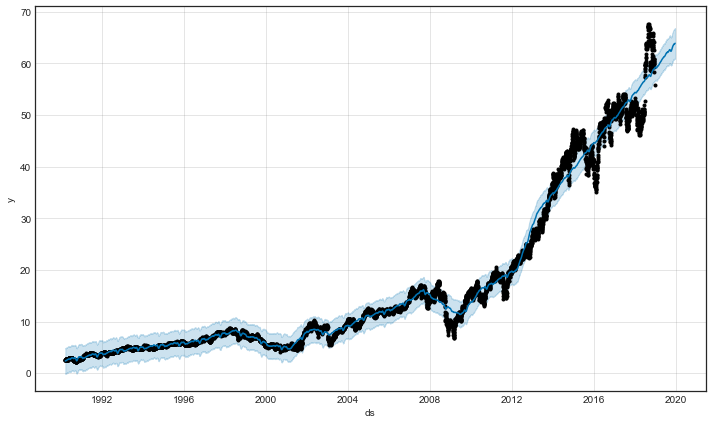

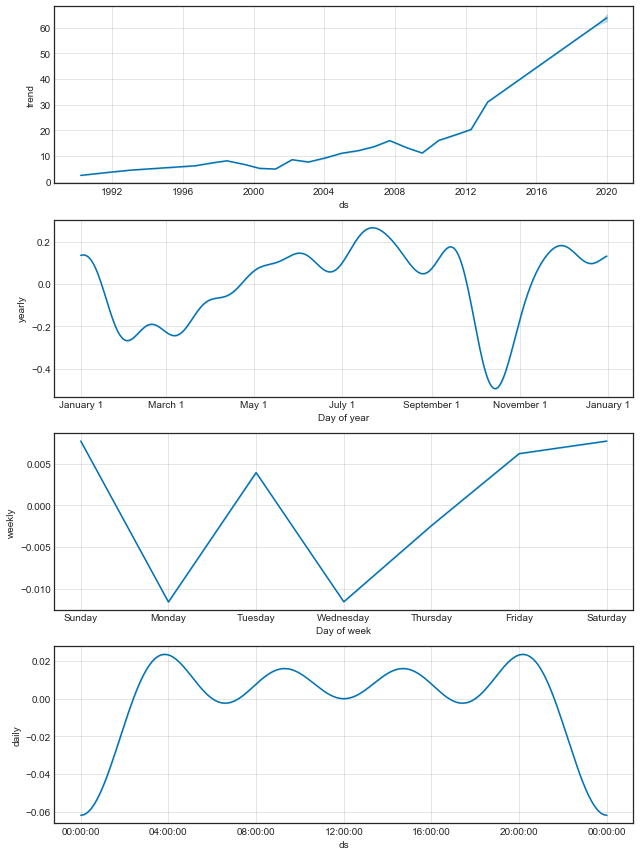

In [10]:
%%time
forecast_df1 = create_forecast('RPM','1900-01-01',datetime.date.today(),'daily')

RMSE:
Wall time: 29.5 s


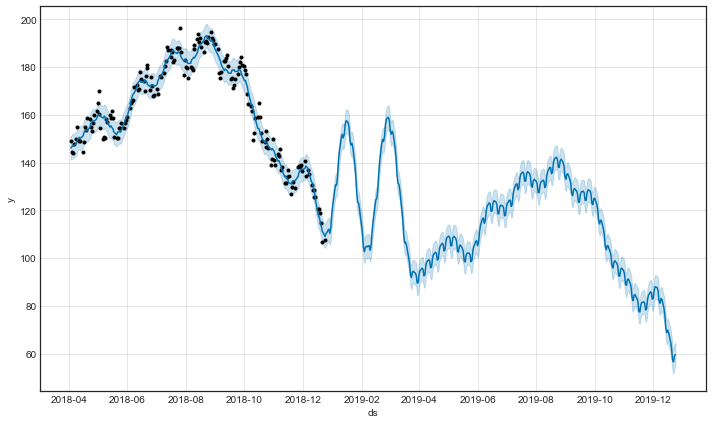

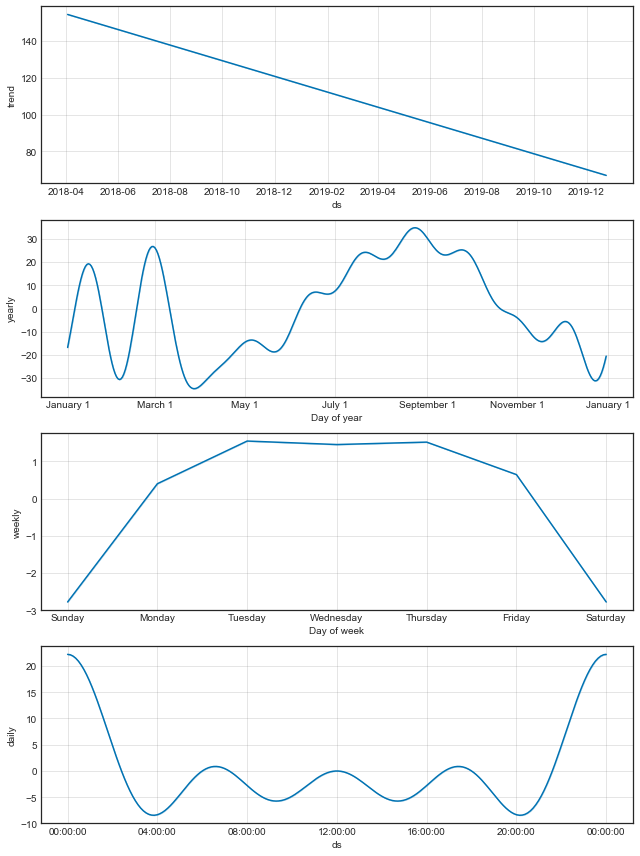

In [12]:
%%time
forecast_df1 = create_forecast('SPOT','1900-01-01',datetime.date.today(),'weekly')